In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\PC\AppData\Local\Temp\ipykernel_14056\2742809955.py:9: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
C:\Users\PC\AppData\Local\Temp\ipykernel_14056\2742809955.py:9: RuntimeWarning: invalid value encountered in multiply
  loss = -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


Gradient Descent converged in 3073800 iterations.
[-146.36445374   13.56272563   77.60443003]


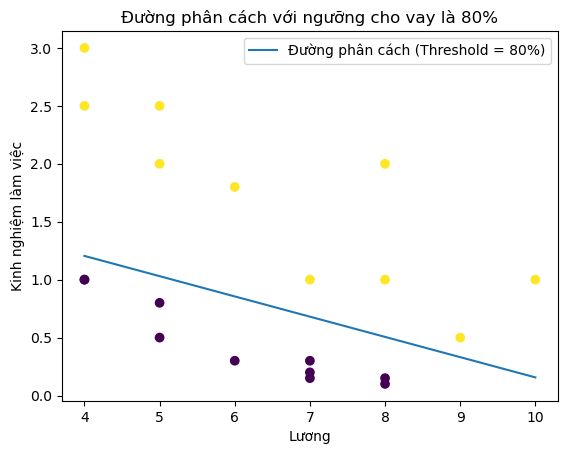

In [27]:

data = pd.read_csv('data (2).csv')
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute the loss function
def compute_loss(X, y, w):
    h = sigmoid(X @ w)
    loss = -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) 
    return loss

# Compute the gradient
def compute_gradient(X, y, w):
    h = sigmoid(X @ w)
    gradient = X.T @ (h - y)
    return gradient

# Gradient Descent algorithm
def gradient_descent(X, y, w, learning_rate, num_iterations):
    loss_history = []
    
    for i in range(num_iterations):
        gradient = compute_gradient(X, y, w)
        w = w - learning_rate * gradient
        loss = compute_loss(X, y, w)
        loss_history.append(loss)
        if np.linalg.norm(gradient, 2) < 1e-6:
            print(f'Gradient Descent converged in {i+1} iterations.')
            break
    else:
        print(f'Gradient Descent did not converge after {num_iterations} iterations.')
    
    return w, loss_history

# Prepare the data
X = data[['salary', 'hour']].values
y = data['cho vay'].values
X = np.hstack([np.ones((X.shape[0], 1)), X])# Add a column of ones for the bias term

# Initialize weights
w = np.zeros(X.shape[1])

# Set hyperparameters
learning_rate = 0.5
num_iterations = 5000000

# Run gradient descent
w, loss_history = gradient_descent(X, y, w, learning_rate, num_iterations)
# Print the final weights
print(w)
# Calculate loan approval probability for a new record
def predict_probability(salary, hour, w):
    x = np.array([1, salary, hour])
    return sigmoid(np.dot(x, w))

# Plot the decision boundary with an 80% threshold
def plot_decision_boundary(X, y, w, threshold=0.8):
    plt.scatter(X[:, 1], X[:, 2], c=y)
    
    x_values = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
    log_odds = np.log(threshold / (1 - threshold))
    y_values = -(w[0] + w[1] * x_values - log_odds) / w[2]
    
    plt.plot(x_values, y_values, label=f'Đường phân cách (Threshold = {threshold*100:.0f}%)')
    plt.xlabel('Lương')
    plt.ylabel('Kinh nghiệm làm việc')
    plt.legend()
    plt.title('Đường phân cách với ngưỡng cho vay là 80%')
    plt.show()

# Plot the decision boundary for an 80% threshold
plot_decision_boundary(X, y, w, threshold=0.8)


In [28]:
salary_new = 9
hour_new = 0.5
probability_new = predict_probability(salary_new, hour_new, w)
print(f'xác suất mà chúng ta dự đoán hồ sơ được cho vay với mức lương {salary_new} triệu và kinh nghiệm làm việc {hour_new} năm: {probability_new:.2f}')
print(f'Quyết định cho vay: {"Được cho vay" if probability_new >= 0.8 else "Không được cho vay"}')


xác suất mà chúng ta dự đoán hồ sơ được cho vay với mức lương 9 triệu và kinh nghiệm làm việc 0.5 năm: 1.00
Quyết định cho vay: Được cho vay
